In [72]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report
import warnings
warnings.filterwarnings('ignore')

In [73]:
comp =pd.read_csv(r'Company_Data.csv')
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


In [74]:
comp.shape

(400, 11)

In [75]:
comp.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [76]:
comp.dtypes

Sales          float64
CompPrice        int64
Income           int64
Advertising      int64
Population       int64
Price            int64
ShelveLoc       object
Age              int64
Education        int64
Urban           object
US              object
dtype: object

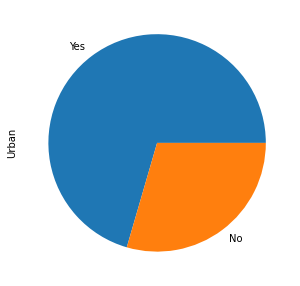

Yes    282
No     118
Name: Urban, dtype: int64


In [77]:
plt.figure(figsize=(5,5))
comp['Urban'].value_counts().plot.pie()
plt.show()
print(comp['Urban'].value_counts())

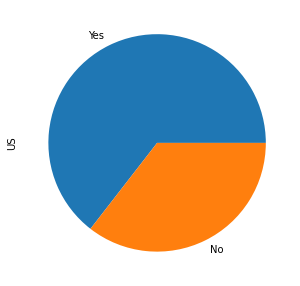

Yes    258
No     142
Name: US, dtype: int64


In [78]:
plt.figure(figsize=(5,5))
comp['US'].value_counts().plot.pie()
plt.show()
print(comp['US'].value_counts())

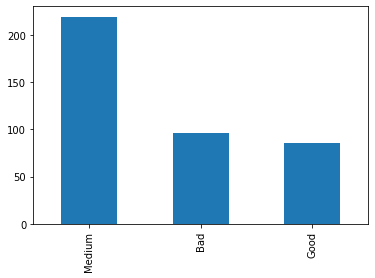

Medium    219
Bad        96
Good       85
Name: ShelveLoc, dtype: int64


In [79]:
comp['ShelveLoc'].value_counts(sort=True).plot.bar()
plt.show()
print(comp['ShelveLoc'].value_counts())

In [80]:
comp['Sales_Range'] = pd.cut(comp.Sales,bins=[0,3,6,10,14,20],
                                     labels=['Poor','Below_Avg','Avg','Above_Avg','Outstanding'],include_lowest=True)
comp

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_Range
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,Avg
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,Above_Avg
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,Above_Avg
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Avg
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Below_Avg
...,...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes,Above_Avg
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes,Avg
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes,Avg
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes,Below_Avg


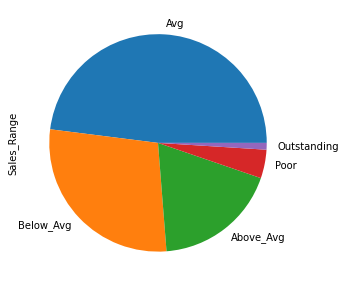

Avg            192
Below_Avg      113
Above_Avg       74
Poor            17
Outstanding      4
Name: Sales_Range, dtype: int64


In [81]:
plt.figure(figsize=(5,5))
comp['Sales_Range'].value_counts().plot.pie()
plt.show()
print(comp['Sales_Range'].value_counts())

In [82]:
#Using Get dummies on dATASET
comp1 = pd.get_dummies(comp.iloc[:,1:11])
comp1

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [83]:
result = pd.concat([comp['Sales_Range'], comp1], axis=1)
display(result)

,Sales_Range,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Avg,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Above_Avg,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Above_Avg,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Avg,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Below_Avg,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Above_Avg,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Avg,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Avg,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Below_Avg,100,79,7,284,95,50,12,1,0,0,0,1,0,1


In [84]:
comp2 = result.copy()
comp2

,Sales_Range,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,Avg,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,Above_Avg,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,Above_Avg,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,Avg,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,Below_Avg,141,64,3,340,128,38,13,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,Above_Avg,138,108,17,203,128,33,14,0,1,0,0,1,0,1
396,Avg,139,23,3,37,120,55,11,0,0,1,1,0,0,1
397,Avg,162,26,12,368,159,40,18,0,0,1,0,1,0,1
398,Below_Avg,100,79,7,284,95,50,12,1,0,0,0,1,0,1


**Model Building**

**Building Decision Tree Classifier using Entropy Criteria**

In [85]:
x=comp2.iloc[:,1:]
y=comp2['Sales_Range']

In [86]:
# Splitting data into training and testing data set
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.35,random_state=4,stratify=y)

In [87]:
num_trees = 100
max_features = 3
kfold = KFold(n_splits=10)
Random_forest_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model.fit(x_train,y_train)

RandomForestClassifier(max_features=3)

In [88]:
Random_forest_results = cross_val_score(Random_forest_model, x_train, y_train, cv=kfold)
print(Random_forest_results.mean())

0.6384615384615384


In [89]:
Random_forest_preds = Random_forest_model.predict(x_test)
pd.crosstab(y_test,Random_forest_preds)


col_0,Above_Avg,Avg,Below_Avg
Sales_Range,,,
Poor,0,1,5
Below_Avg,0,27,13
Avg,4,52,11
Above_Avg,9,17,0
Outstanding,1,0,0


In [90]:
# Accuracy 
np.mean(Random_forest_preds==y_test)

0.5285714285714286

In [91]:
print('Accuracy Score        :',accuracy_score(y_test,Random_forest_preds))
print('Classification Report :\n',classification_report(y_test,Random_forest_preds))

Accuracy Score        : 0.5285714285714286
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.64      0.35      0.45        26
         Avg       0.54      0.78      0.63        67
   Below_Avg       0.45      0.33      0.38        40
 Outstanding       0.00      0.00      0.00         1
        Poor       0.00      0.00      0.00         6

    accuracy                           0.53       140
   macro avg       0.33      0.29      0.29       140
weighted avg       0.50      0.53      0.49       140



**Model 2**

In [92]:
# Splitting data into training and testing data set
x_train1, x_test1,y_train1,y_test1 = train_test_split(x,y, test_size=0.4,random_state=4,stratify=y)

In [93]:
num_trees = 150
max_features = 4
kfold = KFold(n_splits=15)
Random_forest_model1 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model1.fit(x_train1,y_train1)

RandomForestClassifier(max_features=4, n_estimators=150)

In [94]:
Random_forest_results1 = cross_val_score(Random_forest_model1, x_train1, y_train1, cv=kfold)
print(Random_forest_results1.mean())

0.675


In [95]:
Random_forest_preds1 = Random_forest_model1.predict(x_test1)
pd.crosstab(y_test1,Random_forest_preds1)

col_0,Above_Avg,Avg,Below_Avg,Poor
Sales_Range,,,,
Poor,0,1,5,1
Below_Avg,0,26,19,0
Avg,7,58,12,0
Above_Avg,11,19,0,0
Outstanding,1,0,0,0


In [96]:
# Accuracy 
np.mean(Random_forest_preds1==y_test1)

0.55625

In [97]:
print('Accuracy Score        :',accuracy_score(y_test1,Random_forest_preds1))
print('Classification Report :\n',classification_report(y_test1,Random_forest_preds1))

Accuracy Score        : 0.55625
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.58      0.37      0.45        30
         Avg       0.56      0.75      0.64        77
   Below_Avg       0.53      0.42      0.47        45
 Outstanding       0.00      0.00      0.00         1
        Poor       1.00      0.14      0.25         7

    accuracy                           0.56       160
   macro avg       0.53      0.34      0.36       160
weighted avg       0.57      0.56      0.54       160



**Model 3**

In [98]:
# Splitting data into training and testing data set
x_train2, x_test2,y_train2,y_test2 = train_test_split(x,y, test_size=0.33,random_state=82,stratify=y)

In [99]:
num_trees = 200
max_features = 5
kfold = KFold(n_splits=20)
Random_forest_model2 = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
Random_forest_model2.fit(x_train2,y_train2)

RandomForestClassifier(max_features=5, n_estimators=200)

In [100]:
Random_forest_results2 = cross_val_score(Random_forest_model2, x_train2, y_train2, cv=kfold)
print(Random_forest_results2.mean())

0.6370879120879123


In [101]:
Random_forest_preds2 = Random_forest_model2.predict(x_test2)
pd.crosstab(y_test2,Random_forest_preds2)

col_0,Above_Avg,Avg,Below_Avg,Poor
Sales_Range,,,,
Poor,0,0,5,1
Below_Avg,0,19,18,0
Avg,4,49,10,0
Above_Avg,9,16,0,0
Outstanding,1,0,0,0


In [102]:
# Accuracy 
np.mean(Random_forest_preds2==y_test2)

0.5833333333333334

In [103]:
print('Accuracy Score        :',accuracy_score(y_test2,Random_forest_preds2))
print('Classification Report :\n',classification_report(y_test2,Random_forest_preds2))

Accuracy Score        : 0.5833333333333334
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.64      0.36      0.46        25
         Avg       0.58      0.78      0.67        63
   Below_Avg       0.55      0.49      0.51        37
 Outstanding       0.00      0.00      0.00         1
        Poor       1.00      0.17      0.29         6

    accuracy                           0.58       132
   macro avg       0.55      0.36      0.39       132
weighted avg       0.60      0.58      0.56       132



**Check Grid Search CV to get best Parameters**

In [104]:
from sklearn.model_selection import GridSearchCV
grid_cv = GridSearchCV(estimator = RandomForestClassifier(),
                       param_grid = {'n_estimators':[5,10,15,20,30,50,75,100,125,150,175,200],
                                      'criterion': ['gini','entropy'],
                                      'max_depth' : [2,3,5,6,7,8,9,10]},
                                        cv=5)
grid_cv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 6, 7, 8, 9, 10],
                         'n_estimators': [5, 10, 15, 20, 30, 50, 75, 100, 125,
                                          150, 175, 200]})

In [105]:
grid_cv.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'n_estimators': 150}

In [106]:
grid_cv.best_score_

0.6692307692307693

**Now, build the model with max_depth 10 , Entropy Criteria , n_estimators - 150**

In [107]:
rf_final = RandomForestClassifier(n_estimators=100,criterion='entropy',max_depth=10,)
rf_final.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=10)

**Training Accuracy**

In [108]:
y_pred_final_train = rf_final.predict(x_train)

In [109]:
print('Accuracy Score        :',accuracy_score(y_train,y_pred_final_train))
print('Classification Report :\n',classification_report(y_train,y_pred_final_train))

Accuracy Score        : 1.0
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       1.00      1.00      1.00        48
         Avg       1.00      1.00      1.00       125
   Below_Avg       1.00      1.00      1.00        73
 Outstanding       1.00      1.00      1.00         3
        Poor       1.00      1.00      1.00        11

    accuracy                           1.00       260
   macro avg       1.00      1.00      1.00       260
weighted avg       1.00      1.00      1.00       260



**Testing Accuracy**

In [110]:
y_pred_final_test = rf_final.predict(x_test)

In [111]:
print('Accuracy Score        :',accuracy_score(y_test,y_pred_final_test))
print('Classification Report :\n',classification_report(y_test,y_pred_final_test))

Accuracy Score        : 0.5571428571428572
Classification Report :
               precision    recall  f1-score   support

   Above_Avg       0.73      0.42      0.54        26
         Avg       0.55      0.76      0.64        67
   Below_Avg       0.47      0.38      0.42        40
 Outstanding       0.00      0.00      0.00         1
        Poor       1.00      0.17      0.29         6

    accuracy                           0.56       140
   macro avg       0.55      0.35      0.38       140
weighted avg       0.58      0.56      0.54       140



In [112]:
feature_importance = pd.DataFrame({ 'Features'  : x_train.columns,'RF_Features': rf_final.feature_importances_})
feature_importance 

,Features,RF_Features
0,CompPrice,0.102888
1,Income,0.113311
2,Advertising,0.074675
3,Population,0.097471
4,Price,0.195197
5,Age,0.114816
6,Education,0.071080
7,ShelveLoc_Bad,0.053657
8,ShelveLoc_Good,0.079189
9,ShelveLoc_Medium,0.037275


In [113]:
Rf_feature_imp =feature_importance.sort_values(by= 'RF_Features',axis=0,ascending=False,)
Rf_feature_imp

,Features,RF_Features
4,Price,0.195197
5,Age,0.114816
1,Income,0.113311
0,CompPrice,0.102888
3,Population,0.097471
8,ShelveLoc_Good,0.079189
2,Advertising,0.074675
6,Education,0.071080
7,ShelveLoc_Bad,0.053657
9,ShelveLoc_Medium,0.037275


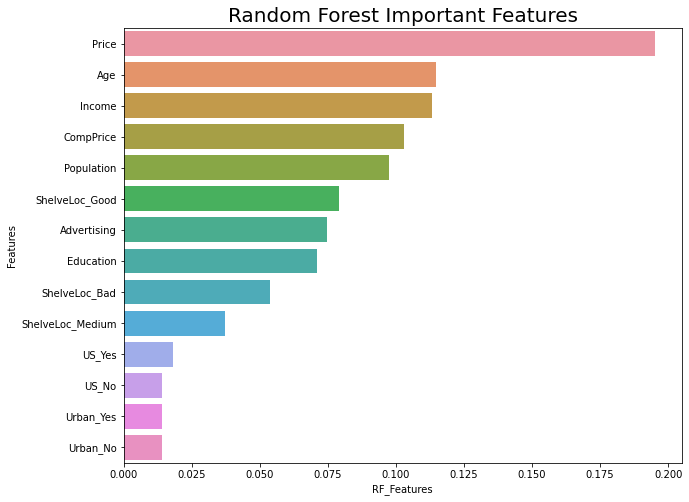

In [114]:
plt.figure(figsize=(10,8))
sns.barplot(x='RF_Features',y='Features',data=Rf_feature_imp,)
plt.title('Random Forest Important Features',size = 20)
plt.show()

**Conclusion**





We Can Clearly see that Price is the important factor determing Sales